# Batch & Layer Normalization

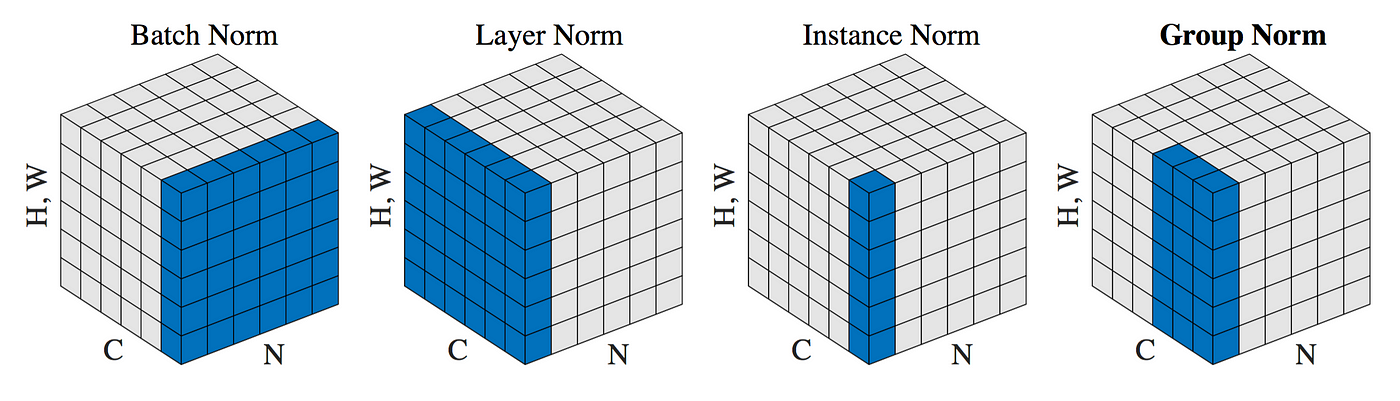

- Batch normalization normalizes each feature independently across the
mini-batch. Layer normalization normalizes each of the inputs in the batch independently across all features.
- As batch normalization is dependent on batch size, it’s not effective for small batch sizes. Lyaer normalization is independent of the batch size, so it can be applied to batches with smaller sizes as well.
- During training, batch normalization computes the mean and standard deviation coresponding to the mini-batch. However, at test time(inference time), we may not necessarily have a batch to compute the batch mean and variance. To overcome this limitation, the model workds by maintaining a moving average of mean and variance at training time, called the moving mean and moving variance. These values are accumulated across batches at training time and used as mean and variance at inference time.

# Mathematical Calculation


In **batch normalization**, we find the mean and standard deviation of all features across batch.

Following is the calculation of batch normalization;

$
\mu_b = \frac{1}{B}\sum_{i=1}^{B}x_i \text{}\text{ }\\ \sigma_b^2 = \frac{1}{B}\sum_{i=1}^{B}(x_i - \mu_b)^2 \text{}\text{ } \\ \hat{x_i} = \frac{x_i - \mu_b}{\sqrt{\sigma_b^2}} \text{}\text{} \\ or\text{ }\hat{x_i} = \frac{x_i - \mu_b}{\sqrt{\sigma_b^2 + \epsilon}} \text{}\text{ }  \\ Adding\text{ }\epsilon\text{ }helps\text{ }when\text{ }\sigma_b^2\text{ }is\text{ }small\\ y_i = \mathcal{BN}(x_i) = \gamma.x_i + \beta \text{}\text{ }
$


In **layer normalization**, we find the aggregations per each inputs across all features(not across all batches)


$
\mu_l = \frac{1}{d}\sum_{i=1}^{d}x_i \text{}\text{ } \\ \sigma_l^2 = \frac{1}{d}\sum_{i=1}^{d}(x_i - \mu_l)^2 \text{}\text{ } \\ \hat{x_i} = \frac{x_i - \mu_l}{\sqrt{\sigma_l^2}} \text{}\text{ } \\ or\text{ }\hat{x_i} = \frac{x_i - \mu_l}{\sqrt{\sigma_l^2 + \epsilon}} \text{}\text{ }  \\ Adding\text{ }\epsilon\text{ }helps\text{ }when\text{ }\sigma_l^2\text{ }is\text{ }small\\ y_i = \mathcal{LN}(x_i) = \gamma.x_i + \beta \text{}\text{ }
$



In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(101)

# NLP Example
batch, sentence_length, embedding_dim = 3, 5, 4
embedding = torch.randn(batch, sentence_length, embedding_dim)
layer_norm = nn.LayerNorm(embedding_dim)
# Activate module
layer_norm(embedding)

tensor([[[-0.7868, -0.3032, -0.6157,  1.7058],
         [-1.5639, -0.0239,  0.4113,  1.1766],
         [ 0.3310, -1.5628,  0.0287,  1.2030],
         [ 0.0994,  0.3084, -1.5844,  1.1766],
         [-1.1997, -0.7687,  1.1116,  0.8568]],

        [[ 1.4416, -0.2042, -1.3652,  0.1278],
         [-1.3164, -0.5653,  1.2384,  0.6433],
         [ 1.6105, -0.8623,  0.0635, -0.8116],
         [-0.7973,  1.4622, -1.0414,  0.3765],
         [-1.1693,  1.5928, -0.1575, -0.2660]],

        [[ 1.6725, -0.6783, -0.1448, -0.8494],
         [ 0.8733, -1.2493,  1.0841, -0.7080],
         [-0.5885,  1.4800, -1.1757,  0.2842],
         [-1.2693,  1.0861, -0.6805,  0.8637],
         [ 1.1632, -1.4505, -0.3570,  0.6443]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
# Image Example
torch.manual_seed(101)
N, C, H, W = 3, 2, 10, 10
input = torch.randn(N, C, H, W)
# Normalize over the last three dimensions (i.e. the channel and spatial dimensions)
# as shown in the image below
layer_norm = nn.LayerNorm([C, H, W])
output = layer_norm(input)
output

tensor([[[[-6.4858e-01, -1.1174e-01, -4.5866e-01,  2.1183e+00, -7.7453e-01,
            2.5729e-02,  2.5190e-01,  6.4960e-01,  3.3417e-01, -1.1883e+00],
          [ 9.1100e-02,  1.0352e+00, -4.3763e-01, -1.9292e-01, -2.4084e+00,
            8.2325e-01, -1.5999e+00, -1.0782e+00,  1.1983e+00,  8.8984e-01],
          [ 1.2119e+00,  1.5020e-01, -5.9871e-01,  3.6439e-01, -6.7279e-01,
           -1.6724e-01,  1.0468e+00,  6.4622e-01,  1.9966e+00, -1.0488e+00],
          [ 9.1341e-02, -9.8635e-01, -1.0058e+00,  4.5389e-01, -1.1634e+00,
           -2.4750e-01, -1.2999e+00,  9.7674e-01, -4.6596e-01, -5.5543e-01],
          [ 4.4200e-01, -8.7089e-01, -5.7290e-01, -9.6642e-01,  8.3873e-01,
           -1.0642e+00,  1.7244e+00, -5.8990e-01,  1.7031e+00,  1.1724e+00],
          [-4.5535e-02, -6.9010e-02,  1.2301e-01, -9.9369e-01,  3.4142e-01,
            2.0594e-01,  1.4796e+00, -3.0243e-01, -1.3742e+00,  9.0892e-01],
          [-8.9428e-01, -2.9202e-01, -5.7823e-01,  4.1122e-01, -6.3579e-01,
      